In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [358]:
data=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Domain Analysis

In [359]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [403]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,1.053606,1.486106,5.498013,3.782434,109.910806,6.483190,3.141852,0.653602,0.286449
std,16.189833,0.429603,0.738974,2.808498,0.526325,0.883599,288.918529,1.085451,0.795519,0.158530,0.452490
min,4.000000,0.000000,0.336472,0.100000,4.158883,2.397895,10.000000,2.700000,0.900000,0.262364,0.000000
25%,33.000000,1.000000,0.587787,0.200000,5.173317,3.178054,25.000000,5.800000,2.600000,0.530628,0.000000
50%,45.000000,1.000000,0.693147,0.300000,5.342334,3.583519,42.000000,6.600000,3.100000,0.666323,0.000000
75%,58.000000,1.000000,1.280934,1.300000,5.700444,4.119004,87.000000,7.200000,3.800000,0.741937,1.000000
max,90.000000,1.000000,4.330733,19.700000,7.654917,7.601402,4929.000000,9.600000,5.500000,1.335001,1.000000


In [361]:
data.describe(include='O')

,Gender
count,583
unique,2
top,Male
freq,441


In [362]:
data.Target.value_counts()

1    416
2    167
Name: Target, dtype: int64

In [363]:
data['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

# EDA

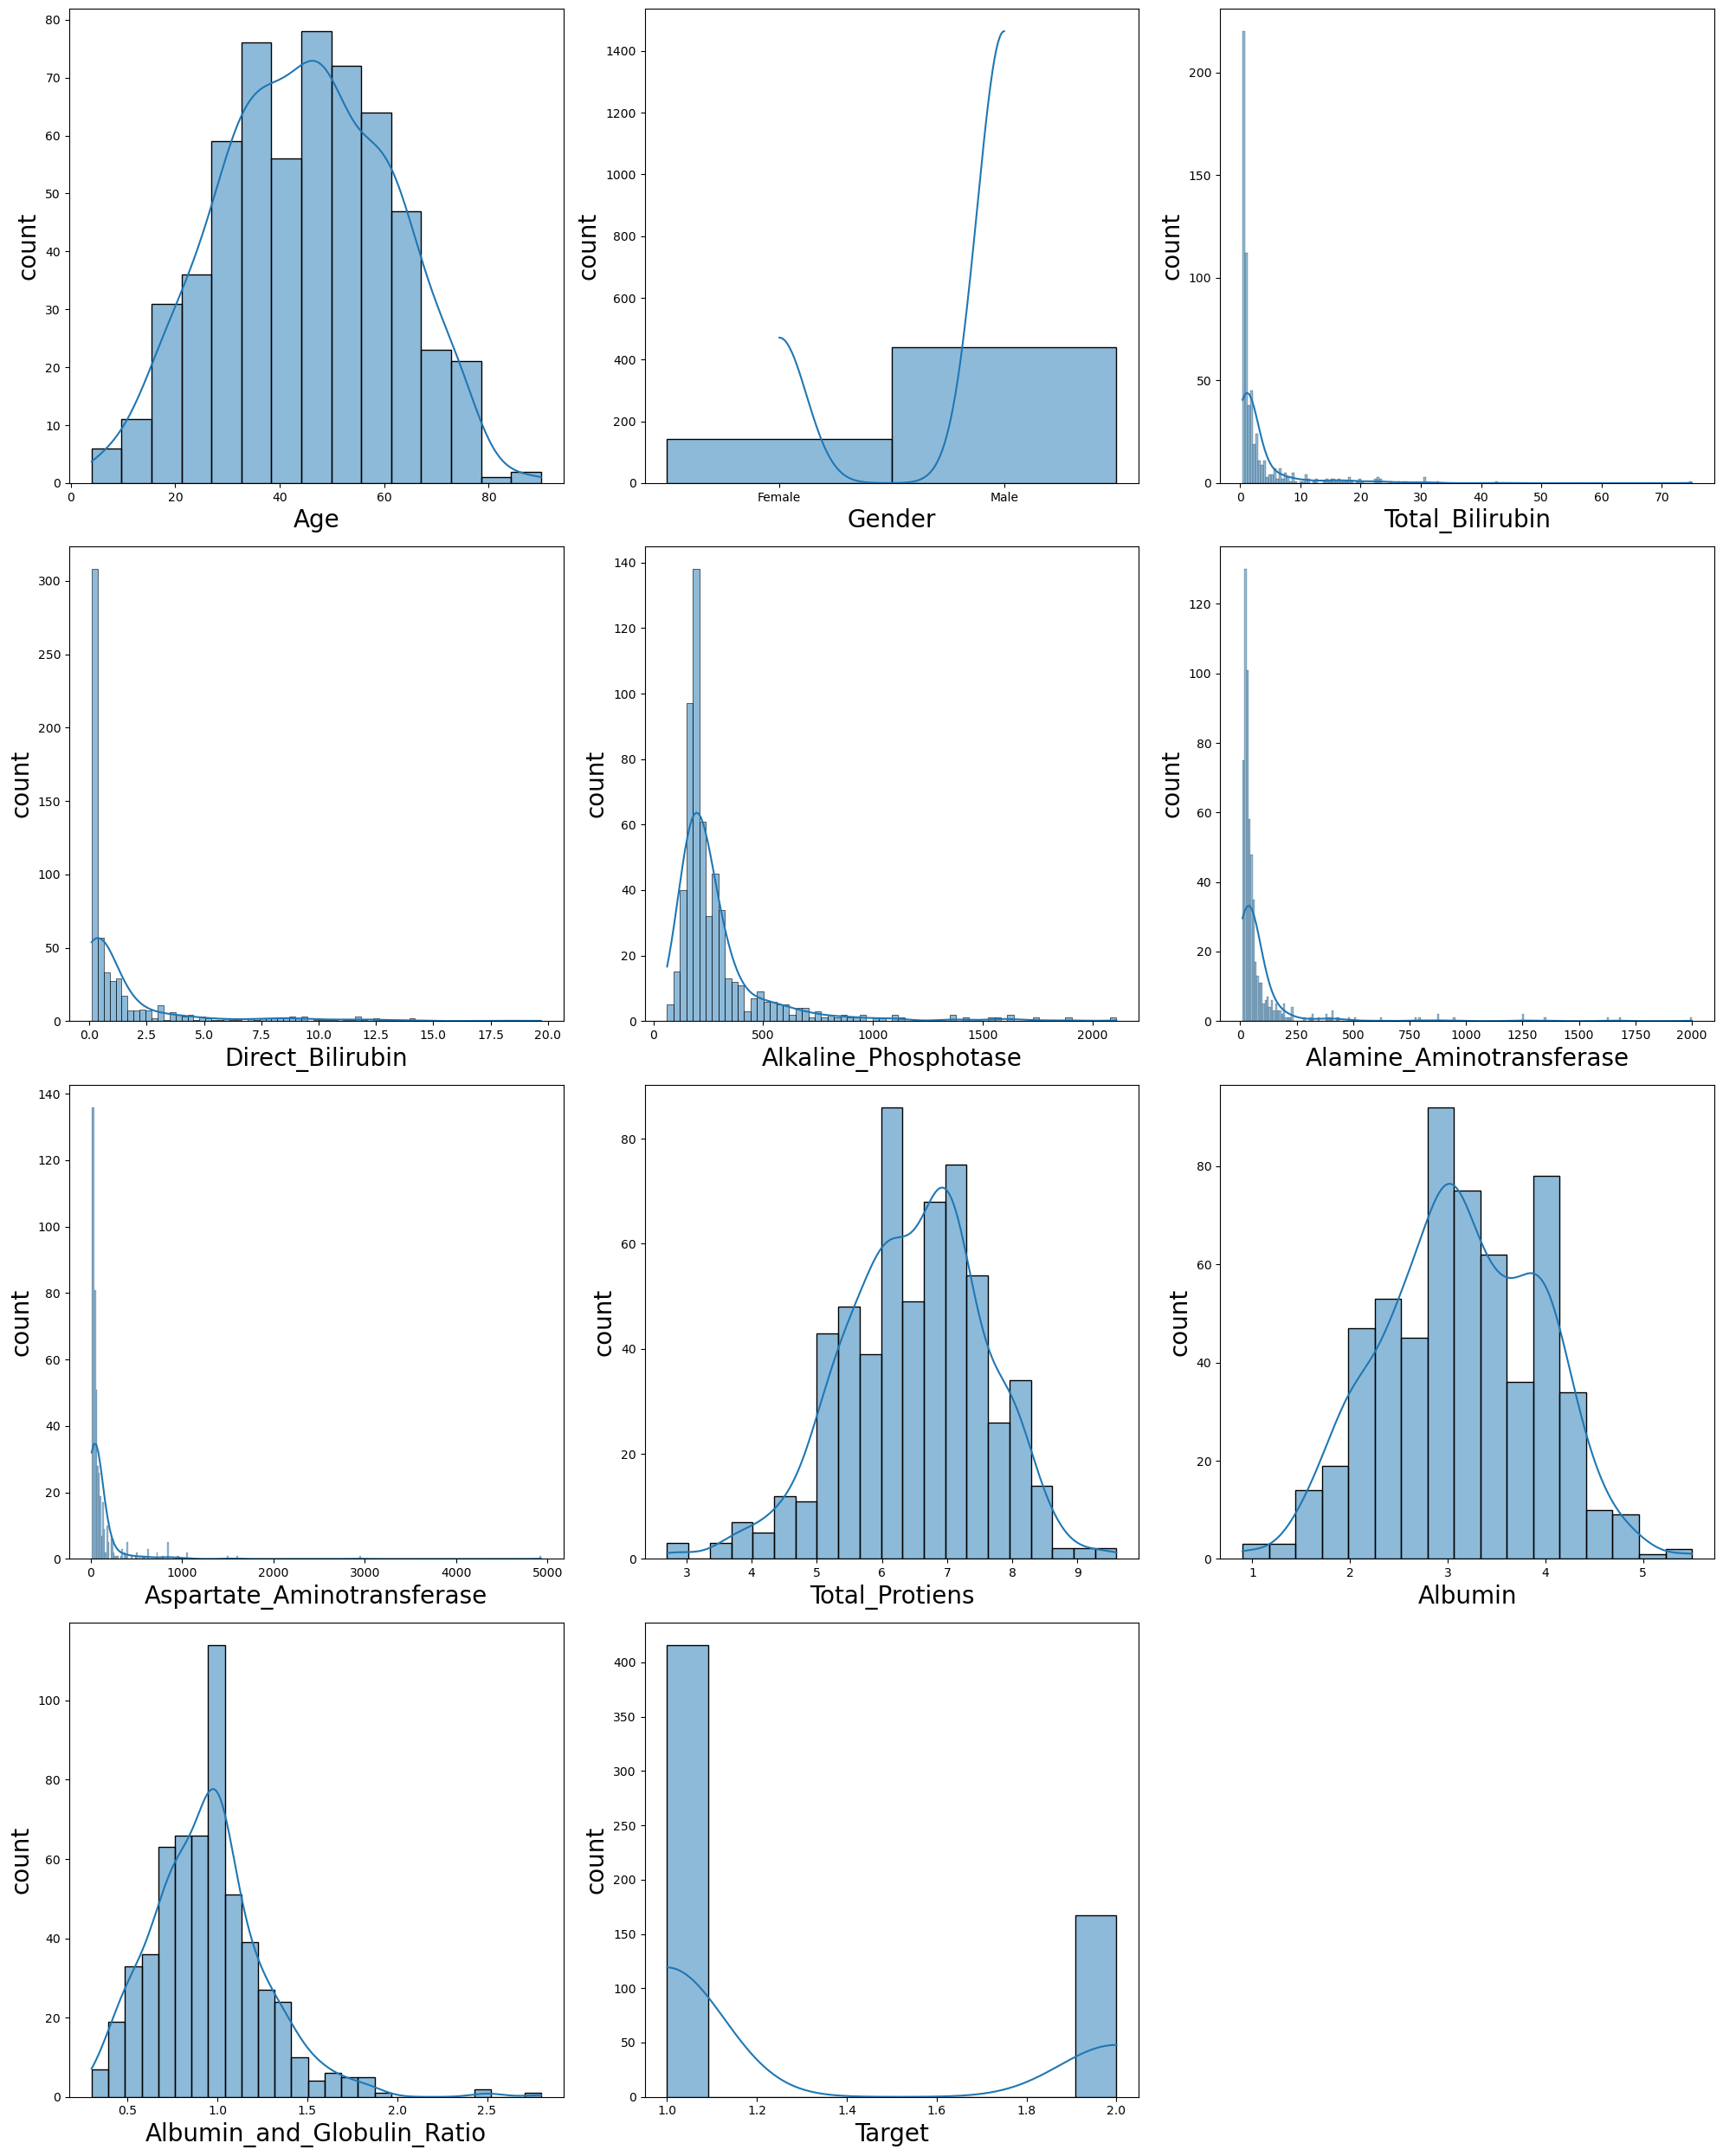

In [364]:
#univariate Analysis
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    plt.subplot(4,3,plotnumber)
    sns.histplot(data[column],kde=True)
    plt.xlabel(column,fontsize=20)
    plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Text(0.5, 1.0, 'Countplot of Gender with Target')

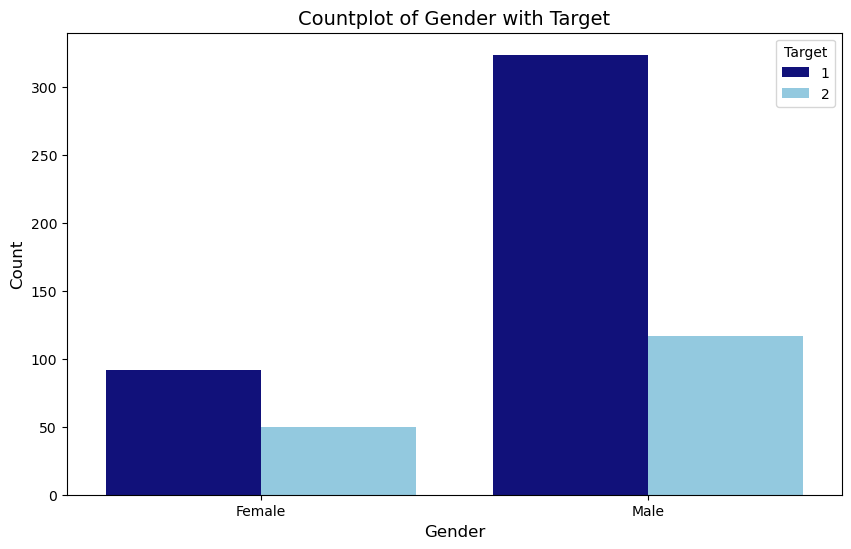

In [365]:
#Bivariate Analysis
colors = {0: 'green', 1: 'Darkblue', 2: 'skyblue'}  # Include all unique levels from 'Target'

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Target', data=data, palette=colors)

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Countplot of Gender with Target', fontsize=14)

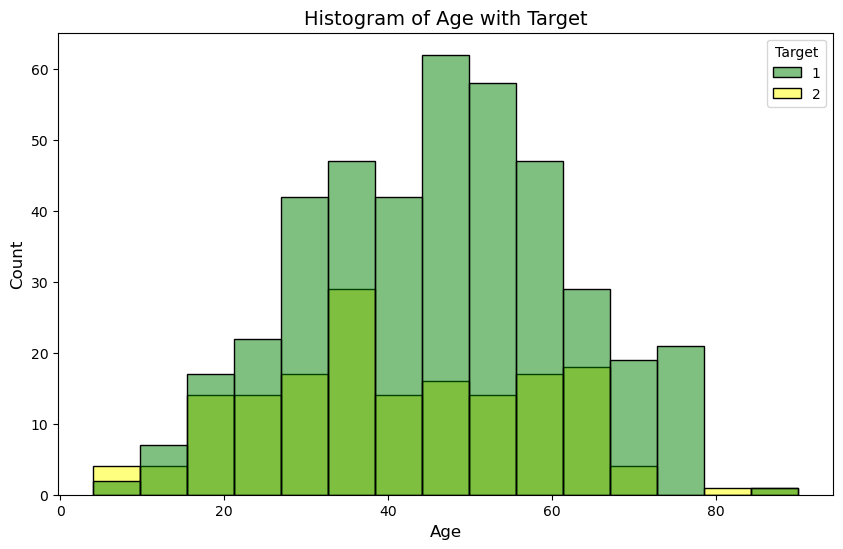

In [366]:
colors = {0: 'black', 1: 'green', 2: 'yellow'}  # Include all unique levels from 'Target'

plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Target', data=data, palette=colors)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Age with Target', fontsize=14)

plt.show()

Text(0.5, 1.0, 'Barplot of Gender Vs Total_Proteins')

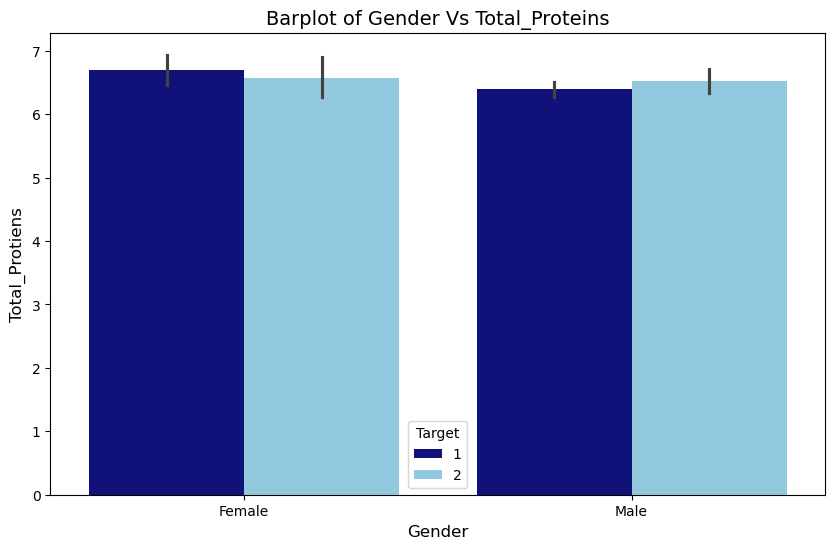

In [367]:
colors = {0: 'green', 1: 'Darkblue', 2: 'skyblue'}  # Include all unique levels from 'Target'

plt.figure(figsize=(10, 6))
sns.barplot(x='Gender',y='Total_Protiens' ,hue='Target', data=data, palette=colors)

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total_Protiens', fontsize=12)
plt.title('Barplot of Gender Vs Total_Proteins', fontsize=14)

Text(0.5, 1.0, 'Scatterplot of Age Vs Total_Proteins')

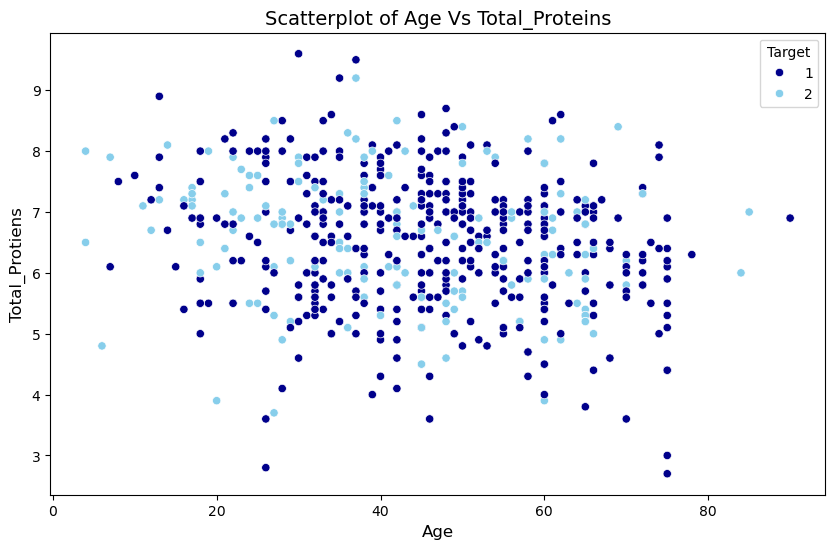

In [368]:
colors = { 1: 'Darkblue', 2: 'skyblue'}  # Include all unique levels from 'Target'

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age',y='Total_Protiens' ,hue='Target', data=data, palette=colors)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Total_Protiens', fontsize=12)
plt.title('Scatterplot of Age Vs Total_Proteins', fontsize=14)

# Identifying the outliers

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

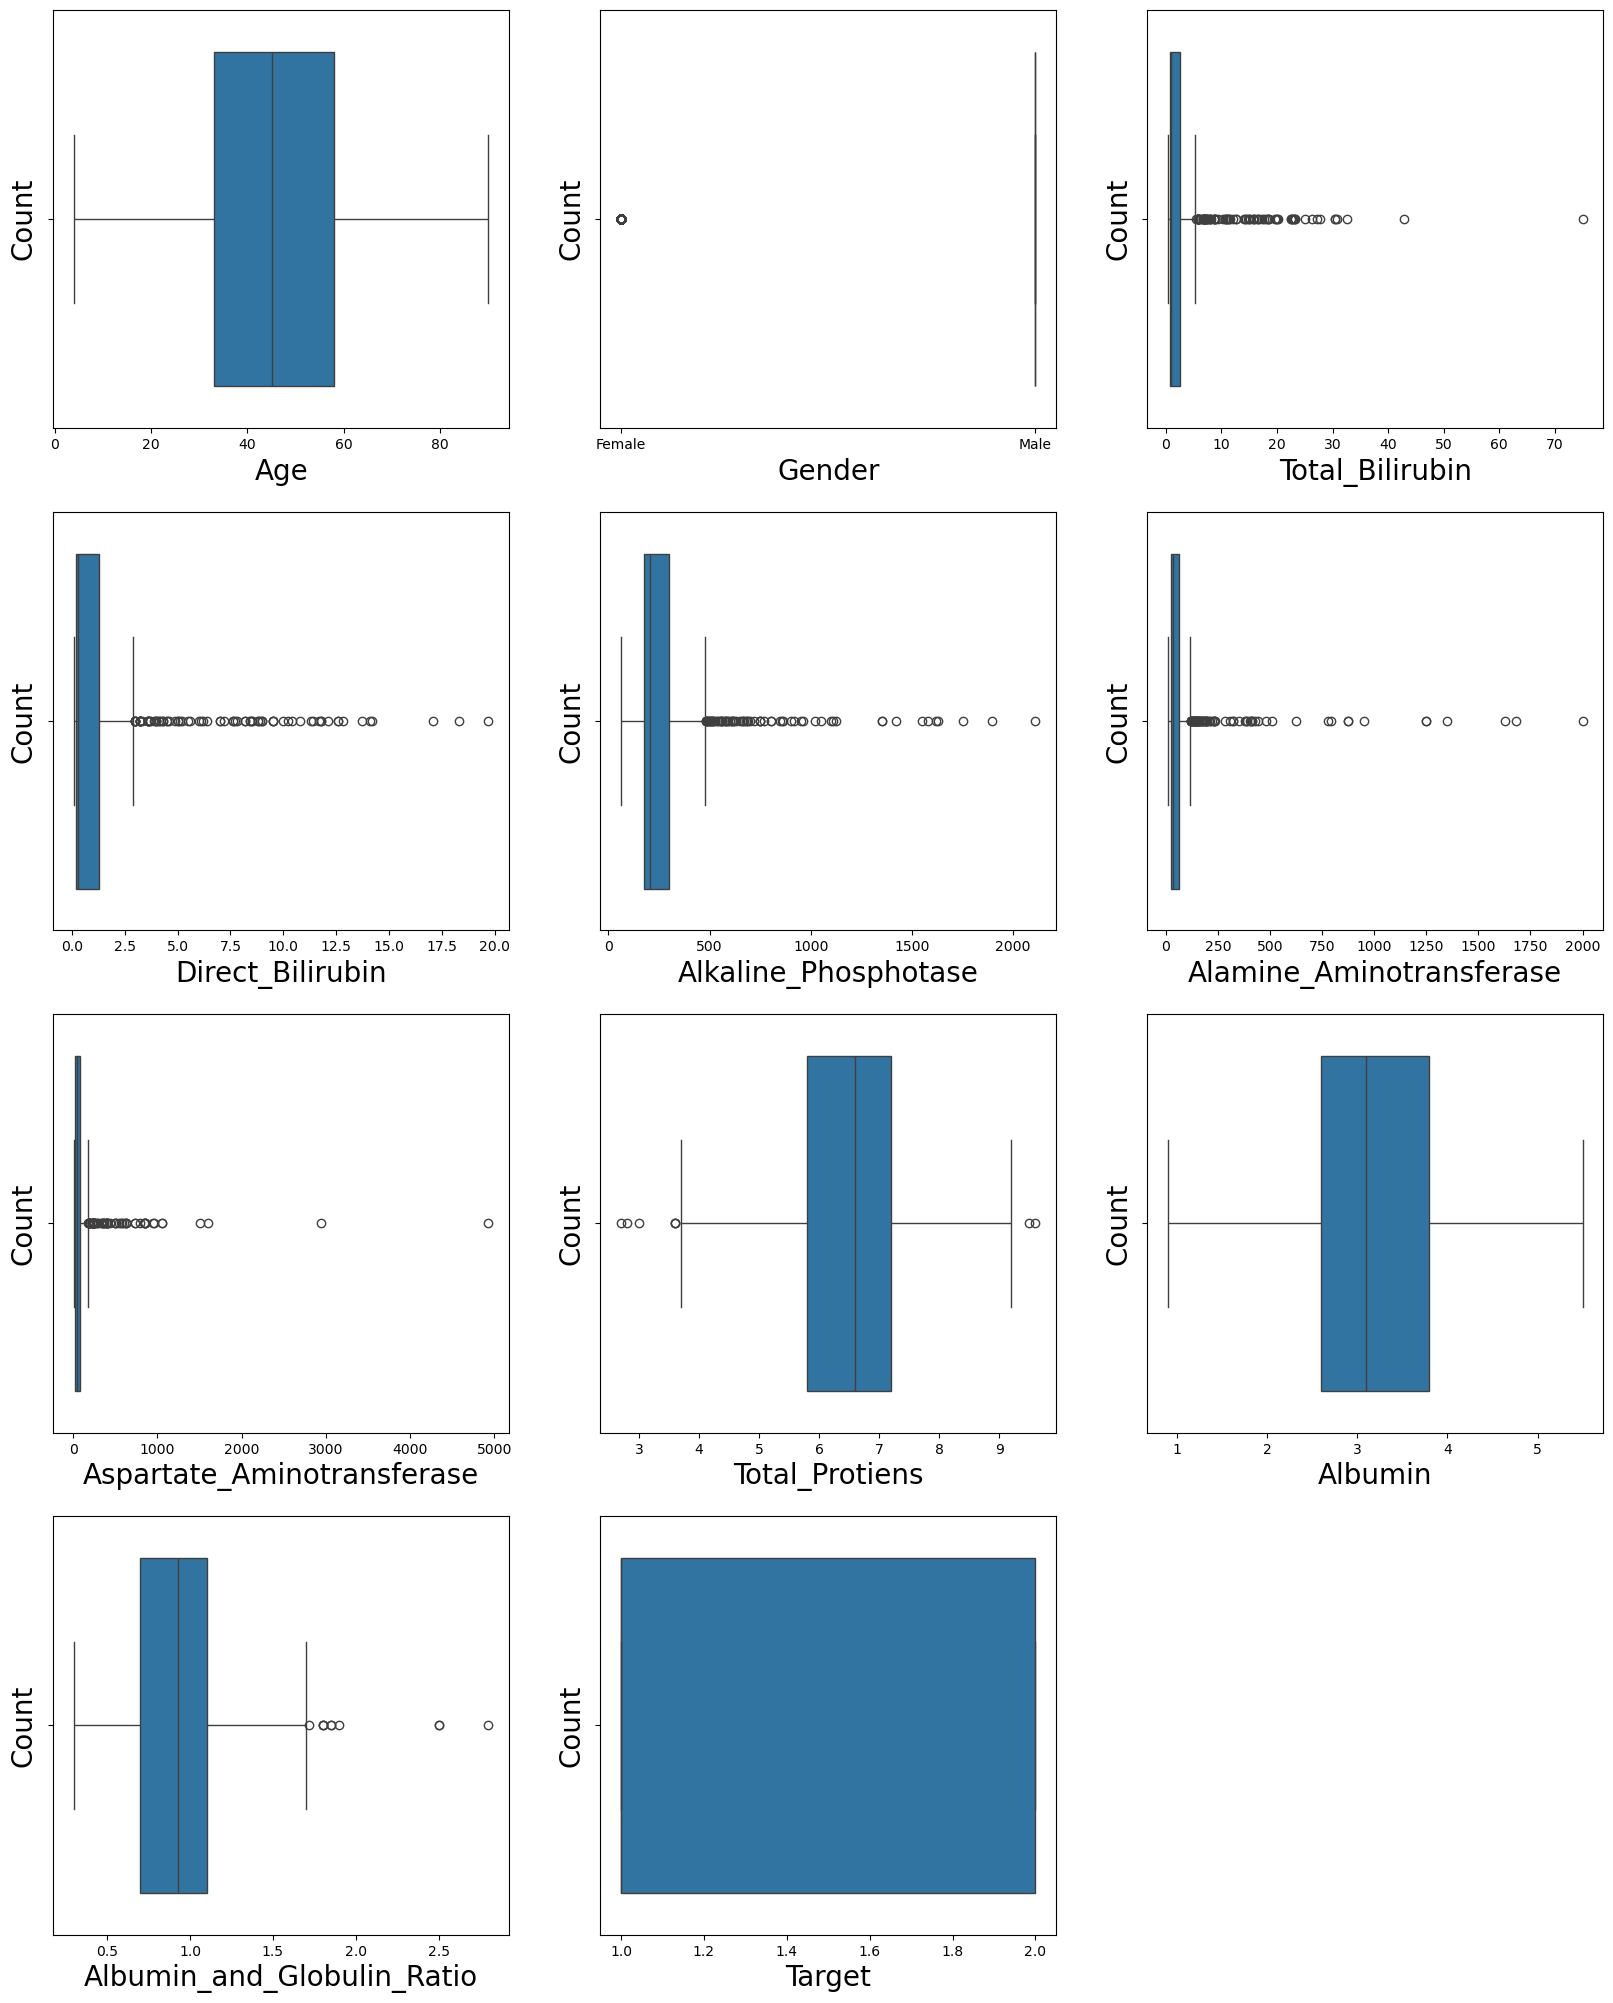

In [369]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in data:
    plt.subplot(4,3,plotnumber)
    sns.boxplot(data[column],orient="h")
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout

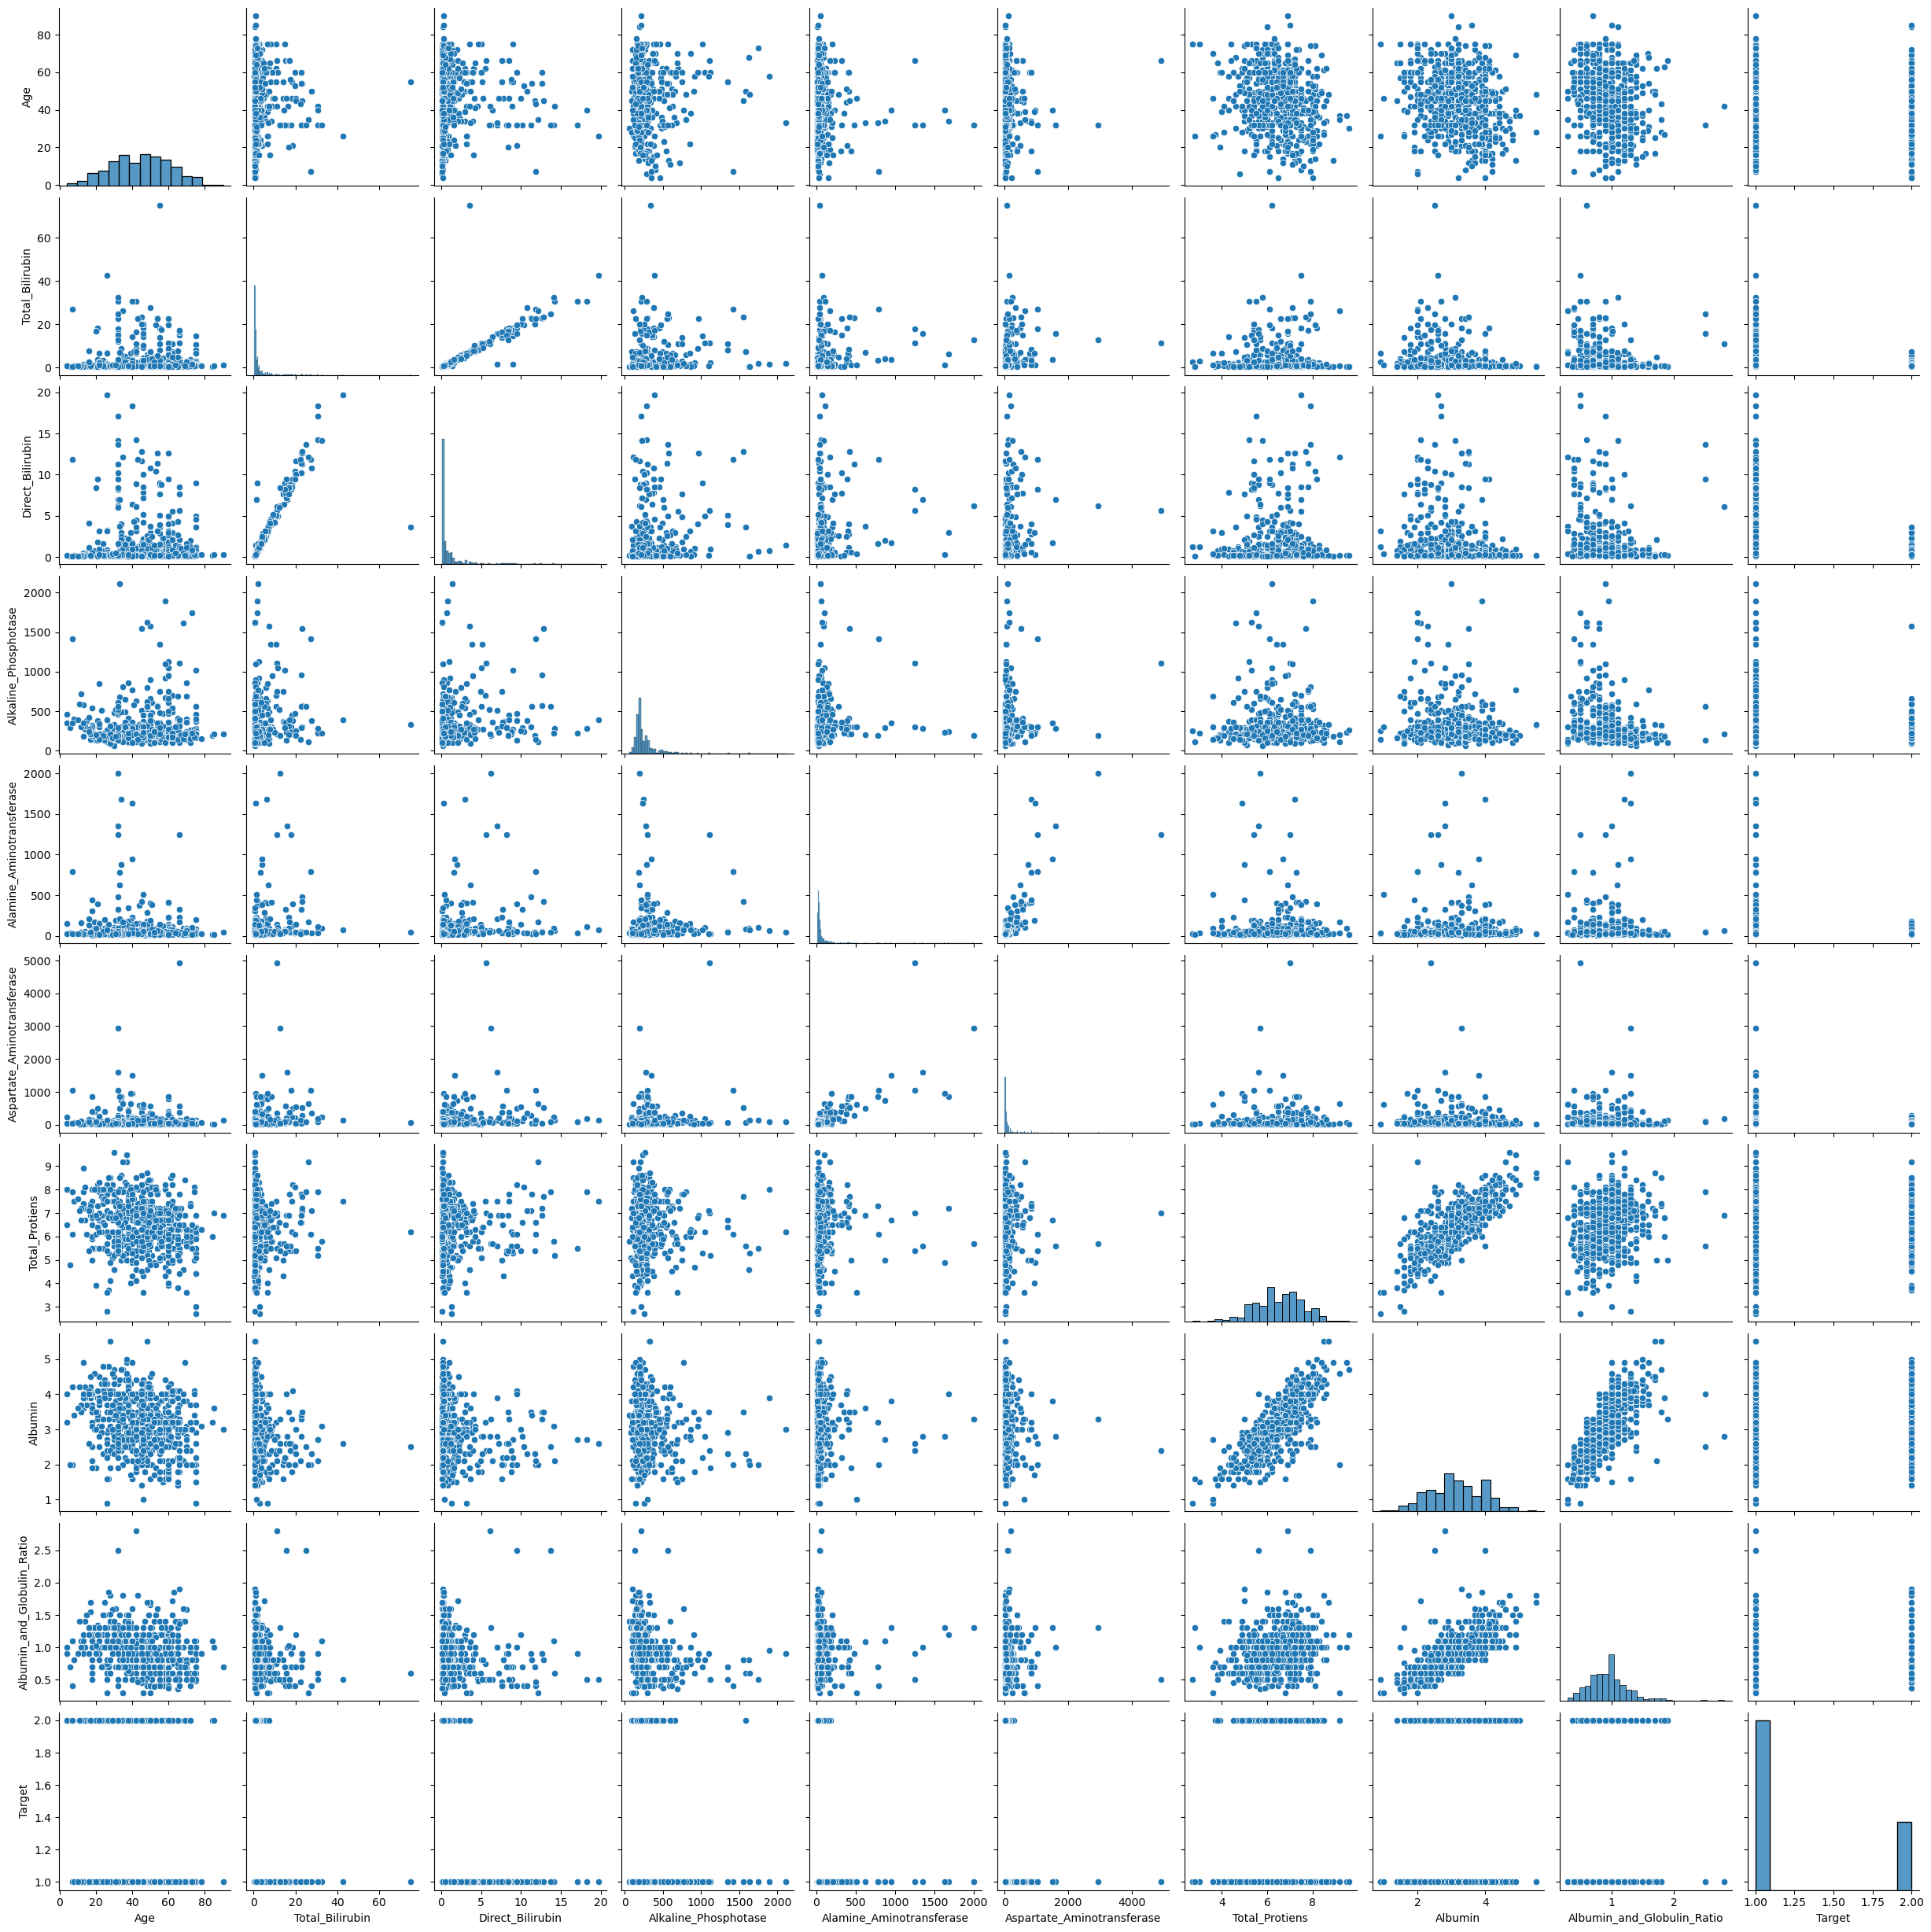

In [370]:
sns.pairplot(data)

C:\Users\hp\AppData\Local\Temp\ipykernel_9108\2891935689.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Matrix=data.corr()


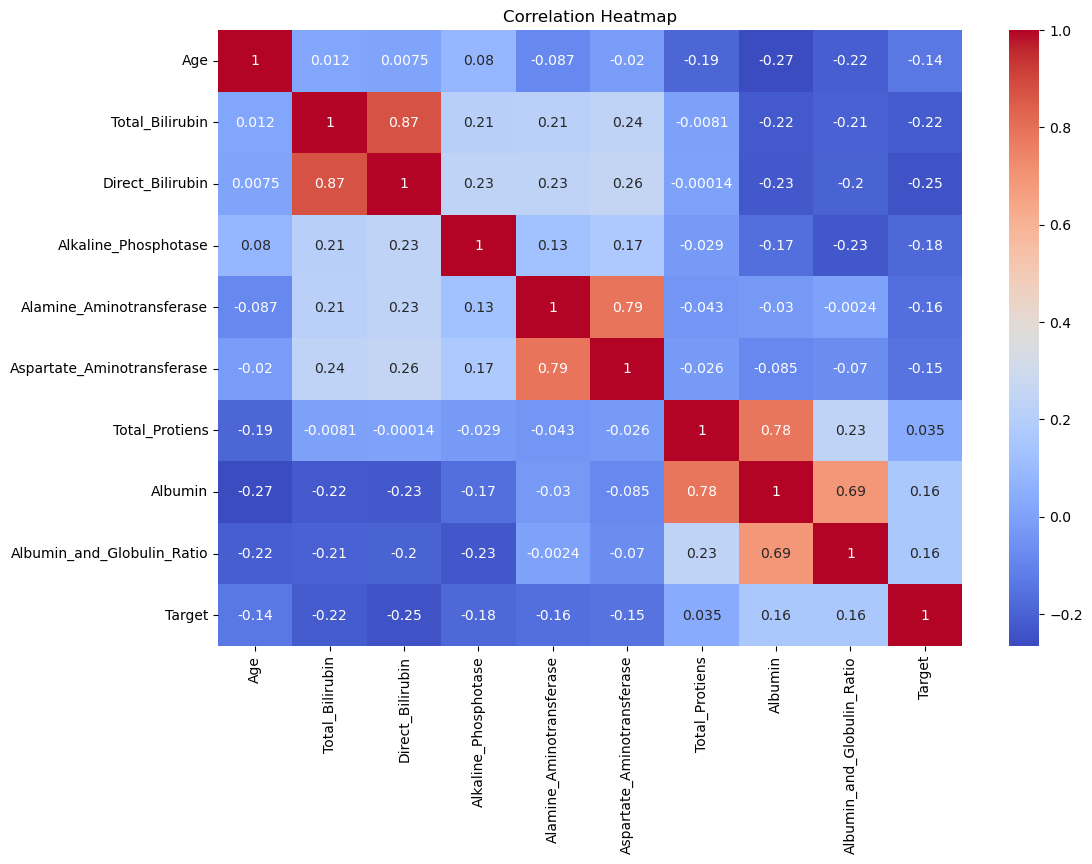

In [371]:
#Correlation Analysis
plt.figure(figsize=(12,8))
Corr_Matrix=data.corr()
sns.heatmap(Corr_Matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [372]:
#finding null values in data
data.isnull().sum() 

# we see 4 null values in "Albumin_and_Globulin_Ratio"

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [373]:
#Handling missing values:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [374]:
#checking for duplicate data
dup=data.duplicated()
data[dup]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [375]:
#count duplicate rows
num_dup=dup.sum()
print(f'Number of duplicate rows : {num_dup}')

Number of duplicate rows : 13


In [376]:
# Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Verify if duplicates are removed
print(f'Number of rows before removing duplicates: {data.shape[0]}')
print(f'Number of rows after removing duplicates: {data_cleaned.shape[0]}')


Number of rows before removing duplicates: 583
Number of rows after removing duplicates: 570


In [378]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [379]:
# save skewed features
skewed_cols = ['Albumin_and_Globulin_Ratio','Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase']

for c in skewed_cols:
    data[c] = data[c].apply('log1p')

In [380]:
# #replacing outliers with median
# data.loc[data['Total_Bilirubin']>1.2,'Total_Bilirubin']=np.median(data.Total_Bilirubin)
# data.loc[data['Direct_Bilirubin']>0.4,'Direct_Bilirubin']=np.median(data.Direct_Bilirubin)
# data.loc[(data['Alkaline_Phosphotase']>245) | (data['Alkaline_Phosphotase']<125)  ,'Alkaline_Phosphotase']=np.median(data.Alkaline_Phosphotase)
# data.loc[data['Alamine_Aminotransferase']>54,'Alamine_Aminotransferase']=np.median(data.Alamine_Aminotransferase)
# data.loc[data['Aspartate_Aminotransferase']>66,'Aspartate_Aminotransferase']=np.median(data.Aspartate_Aminotransferase)
# data.loc[data['Total_Protiens']<3.5,'Total_Protiens']=np.median(data.Total_Protiens)
# data.loc[data['Albumin_and_Globulin_Ratio']>1.7,'Albumin_and_Globulin_Ratio']=np.median(data.Albumin_and_Globulin_Ratio)

In [381]:
# # Gender Encoding
# data['Gender']=data['Gender'].map({'Male': 1, 'Female': 0})

In [382]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [383]:
data['Gender']=label_encoder.fit_transform(data['Gender'])
data['Target']=label_encoder.fit_transform(data['Target'])

In [384]:
data.Gender.value_counts()

1    441
0    142
Name: Gender, dtype: int64

In [385]:
data.Target.value_counts()
# 0 - Liver patient
# 1 - No patient 

0    416
1    167
Name: Target, dtype: int64

In [386]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
data1=sc.fit_transform(data.drop(['Gender','Target'],axis=1)) #scaling other columns except two

In [387]:
data1

array([[0.70930233, 0.04860874, 0.        , ..., 0.5942029 , 0.52173913,
        0.35379135],
       [0.6744186 , 0.53578524, 0.2755102 , ..., 0.69565217, 0.5       ,
        0.27177964],
       [0.6744186 , 0.44558511, 0.20408163, ..., 0.62318841, 0.52173913,
        0.34887164],
       ...,
       [0.55813953, 0.06291888, 0.00510204, ..., 0.53623188, 0.5       ,
        0.40161117],
       [0.31395349, 0.12428754, 0.02040816, ..., 0.5942029 , 0.54347826,
        0.40161117],
       [0.39534884, 0.08929685, 0.01020408, ..., 0.66666667, 0.76086957,
        0.60964389]])

In [388]:
data2=pd.DataFrame(data1,columns=['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'])
data2.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.709302,0.048609,0.000000,0.308223,0.083659,0.001626,0.594203,0.521739,0.353791
1,0.674419,0.535785,0.275510,0.684260,0.341403,0.018296,0.695652,0.500000,0.271780
2,0.674419,0.445585,0.204082,0.582821,0.329197,0.011791,0.623188,0.521739,0.348872
3,0.627907,0.089297,0.015306,0.300513,0.059605,0.002033,0.594203,0.543478,0.401611
4,0.790698,0.313641,0.096939,0.320143,0.179554,0.009961,0.666667,0.326087,0.069090


In [389]:
final_df=pd.concat([data2,data[['Gender','Target']]],axis=1)
final_df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender,Target
0,0.709302,0.048609,0.000000,0.308223,0.083659,0.001626,0.594203,0.521739,0.353791,0,0
1,0.674419,0.535785,0.275510,0.684260,0.341403,0.018296,0.695652,0.500000,0.271780,1,0
2,0.674419,0.445585,0.204082,0.582821,0.329197,0.011791,0.623188,0.521739,0.348872,1,0
3,0.627907,0.089297,0.015306,0.300513,0.059605,0.002033,0.594203,0.543478,0.401611,1,0
4,0.790698,0.313641,0.096939,0.320143,0.179554,0.009961,0.666667,0.326087,0.069090,1,0


# Model Creation

In [390]:
minority = final_df[final_df.Target==1]
majority = final_df[final_df.Target==0]

print('Minority size:', minority.shape)
print('Majority size:', majority.shape)

Minority size: (167, 11)
Majority size: (416, 11)


In [391]:
from sklearn.utils import resample #Sampling the data to balance it
minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
print('Minority upsampled size:', minority_upsample.shape)

Minority upsampled size: (416, 11)


In [392]:
final_df = pd.concat([minority_upsample, majority], axis=0)

In [393]:
X=final_df.drop(['Target'],axis=1)
y=final_df['Target']
# X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

In [394]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [395]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,precision_score,recall_score

models={
    "LR":LogisticRegression(),
    "RFC":RandomForestClassifier(),
    "SVC":SVC(),
    "GBC":GradientBoostingClassifier(),
    "DT":DecisionTreeClassifier(),
    "XGB":XGBClassifier()
}


for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    print(f' Training model {name} \n-----------------------------------------------------------------------')
    print(f' Training f1 score is: {f1_score(y_train,model.predict(X_train))}')
    print(f' Testing f1 score is: {f1_score(y_test,y_pred)}')
    print(f'Classification report : \n {classification_report(y_test,y_pred)}')
    print(f'Confusion matrix: \n {confusion_matrix(y_test,y_pred)}')
    print()

 Training model LR 
-----------------------------------------------------------------------
 Training f1 score is: 0.740053050397878
 Testing f1 score is: 0.6987951807228915
Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.64      0.70        92
           1       0.64      0.77      0.70        75

    accuracy                           0.70       167
   macro avg       0.71      0.71      0.70       167
weighted avg       0.71      0.70      0.70       167

Confusion matrix: 
 [[59 33]
 [17 58]]

 Training model RFC 
-----------------------------------------------------------------------
 Training f1 score is: 1.0
 Testing f1 score is: 0.8875
Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.85      0.90        92
           1       0.84      0.95      0.89        75

    accuracy                           0.89       167
   macro avg       0.89      0.90      0

# The best model among these models is XGB classifier becuase:

Tuning the XGB classifier for better results.

In [396]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0]
}

# Create the model pipeline with SMOTE and XGBoost
model_pipeline = ImbPipeline(steps=[
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Perform grid search
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
x_pred = best_model.predict(X_train)

print(classification_report(y_train,x_pred))

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.6}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       324
           1       1.00      0.99      1.00       341

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        92
           1       0.83      0.91      0.87        75

    accuracy                           0.87       167
   macro avg       0.87      0.88      0.87       167
weighted avg       0.88      0.87      0.87       167



# Conclusion

XGBoost model With / Without hyperparameter tuning and regularization demonstrated the highest performance
The model effectively distinguishes between patients with and without liver disease, demonstrating a balanced performance across both classes.

In [397]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import Pipeline as ImbPipeline
# # from imblearn.pipeline import Pipeline as ImbPipeline

# # Define the parameter grid with more extensive search
# param_dist = {
#     'classifier__n_estimators': [50, 100, 200, 300],
#     'classifier__max_depth': [3, 5, 7, 10],
#     'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'classifier__subsample': [0.6, 0.8, 1.0],
#     'classifier__colsample_bytree': [0.6, 0.8, 1.0],
#     'classifier__min_child_weight': [1, 3, 5]
# }

# # Create the model pipeline with SMOTE and XGBoost
# model_pipeline = ImbPipeline(steps=[
    
#     ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
# ])

# # Perform random search
# random_search = RandomizedSearchCV(model_pipeline, param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1, verbose=2, random_state=42)
# random_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = random_search.best_params_
# print(f"Best parameters found: {best_params}")

# # Evaluate the model with the best parameters
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)
# print(classification_report(y_test, y_pred))


In [398]:
# from imblearn.combine import SMOTEENN

# # Create the model pipeline with SMOTEENN and XGBoost
# model_pipeline = ImbPipeline(steps=[

#     ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
# ])

# # Perform random search
# random_search = RandomizedSearchCV(model_pipeline, param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1, verbose=2, random_state=42)
# random_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = random_search.best_params_
# print(f"Best parameters found: {best_params}")

# # Evaluate the model with the best parameters
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)
# print(classification_report(y_test, y_pred))


In [399]:
# from sklearn.calibration import CalibratedClassifierCV

# # Create the model pipeline with SMOTE and XGBoost
# model_pipeline = ImbPipeline(steps=[
#     ('smote', SMOTE(random_state=42)),
#     ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
# ])

# # Fit the model
# model_pipeline.fit(X_train, y_train)

# # Calibrate the model
# calibrated_clf = CalibratedClassifierCV(estimator=model_pipeline, cv='prefit')
# calibrated_clf.fit(X_train, y_train)

# # Make predictions
# y_pred = calibrated_clf.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred))


In [400]:


# # Define the parameter grid with more extensive search
# param_dist = {
#     'classifier__n_estimators': [50, 100, 200, 300, 500],
#     'classifier__max_depth': [3, 5, 7, 10, 12],
#     'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#     'classifier__subsample': [0.6, 0.8, 1.0],
#     'classifier__colsample_bytree': [0.6, 0.8, 1.0],
#     'classifier__min_child_weight': [1, 3, 5, 7]
# }

# # Create the model pipeline with SMOTE and XGBoost
# model_pipeline = ImbPipeline(steps=[
#     ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
# ])

# # Perform random search
# random_search = RandomizedSearchCV(model_pipeline, param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1, verbose=2, random_state=42)
# random_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = random_search.best_params_
# print(f"Best parameters found: {best_params}")

# # Evaluate the model with the best parameters
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)
# x_pred = best_model.predict(X_train)
# print(classification_report(y_test, y_pred))
# print(classification_report(y_train,x_pred))


In [401]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from xgboost import XGBClassifier

# # Create base models
# base_models = [
#     ('lr', LogisticRegression(random_state=42)),
#     ('rf', RandomForestClassifier(random_state=42)),
#     ('svc', SVC(random_state=42)),
#     ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
# ]

# # Create the stacking model
# stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# # Create the model pipeline with SMOTE and StackingClassifier
# model_pipeline = ImbPipeline(steps=[
#     ('smote', SMOTE(random_state=42)),
#     ('classifier', stacking_model)
# ])

# # Fit the model
# model_pipeline.fit(X_train, y_train)

# # Evaluate the model
# y_pred = model_pipeline.predict(X_test)
# print(classification_report(y_test, y_pred))
